In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Consider the following three variables for 20 different basketball players: points, assists, and rebounds.
# Perform k-means clustering manually with K=2, using Euclidean distance. Show the working for one iteration
# in your Lab Observation Book by using Euclidean distance.

In [3]:
df1 = pd.read_csv('q1.csv')
df1

,points,assists,rebounds
0,18.0,3.0,15
1,19.0,4.0,14
2,14.0,5.0,10
3,14.0,4.0,8
4,11.0,7.0,14
5,20.0,8.0,13
6,28.0,7.0,9
7,30.0,6.0,5
8,31.0,9.0,4
9,35.0,12.0,11


In [4]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def minkowski_distance(x1, x2, p=2):
    return np.power(np.sum(np.abs(x1 - x2) ** p), 1/p)

In [5]:
def kmeans(df, k, dist_metric=euclidean_distance, max_iters=100, thresh=1e-4):
    centroids = df.sample(n=k).to_numpy()
    points = df.to_numpy()
    sse_history = []
    
    for _ in range(max_iters):
        distances = np.zeros((points.shape[0], k))
        for i in range(k):
            distances[:, i] = np.linalg.norm(points - centroids[i], axis=1)

        labels = np.argmin(distances, axis=1)
        sse = np.sum(np.min(distances, axis=1) ** 2)
        sse_history.append(sse)

        new_centroids = np.array([points[labels == i].mean(axis=0) for i in range(k)])

        if np.all(np.abs(new_centroids - centroids) < thresh):
            break
        centroids = new_centroids
        
    return labels, pd.DataFrame(centroids, columns=df.columns), sse_history

In [6]:
def plot_clusters_3d(df, labels, centroids, k):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df['points'], df['assists'], df['rebounds'], c=labels, cmap='viridis', marker='o')
    
    ax.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], centroids.iloc[:, 2], c='red', s=100, marker='x', label='Centroids')
    
    ax.set_title(f'K-Means Clustering (K={k})')
    ax.set_xlabel('Points')
    ax.set_ylabel('Assists')
    ax.set_zlabel('Rebounds')
    ax.legend()
    plt.show()

In [7]:
def plot_sse(sse_list):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(sse_list) + 1), sse_list, marker='o')
    plt.title('Elbow Method For Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.xticks(range(1, len(sse_list) + 1))
    plt.grid()

    optimal_k = np.argmin(np.diff(sse_list, 2)) + 2
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal K={optimal_k}')
    plt.legend()
    plt.show()

    return optimal_k

In [8]:
def runner(df, dist_metric, k_vals=[1,2,3,4]):
    sse_results = []
    for k in k_vals:
        labels, centroids, sse_history = kmeans(df, k)
        sse_results.append(sse_history[-1])
        plot_clusters_3d(df, labels, centroids, k)
    plot_sse(sse_results)    

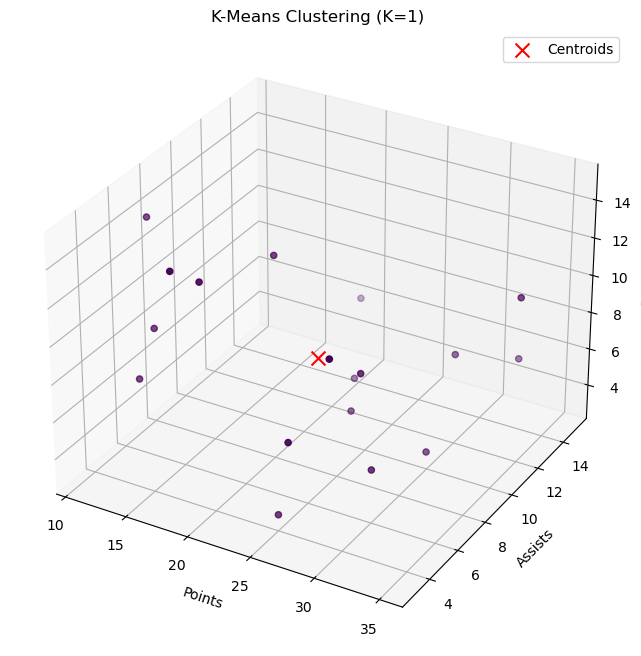

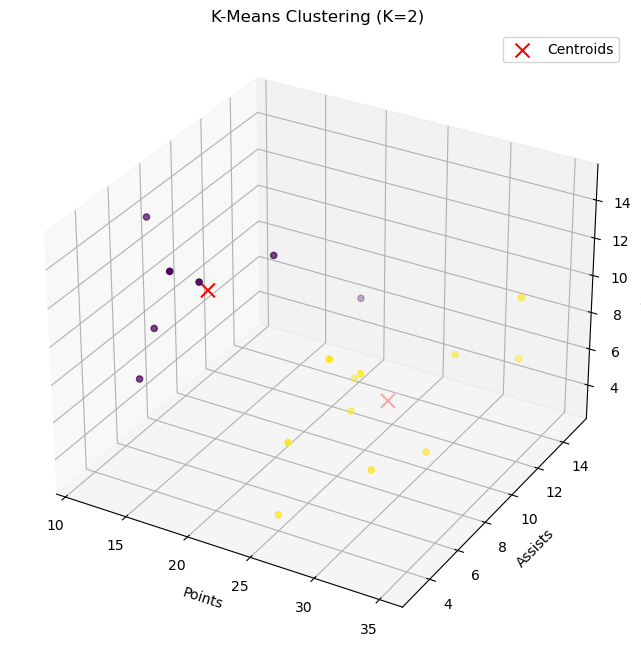

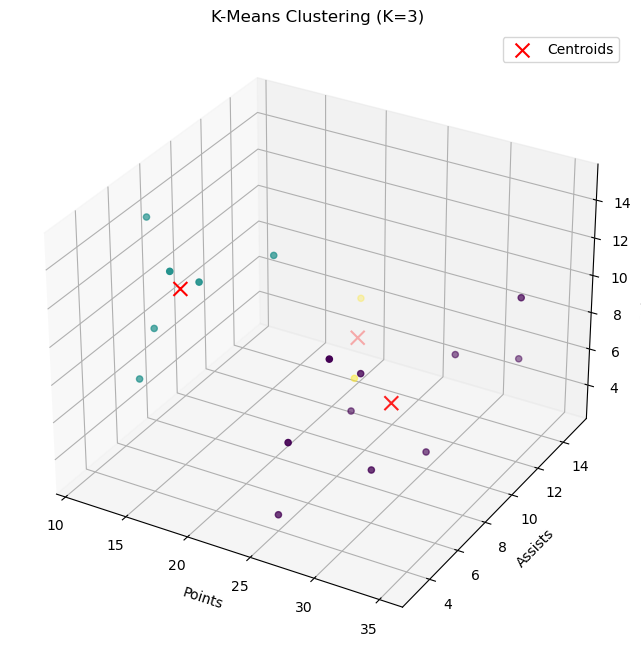

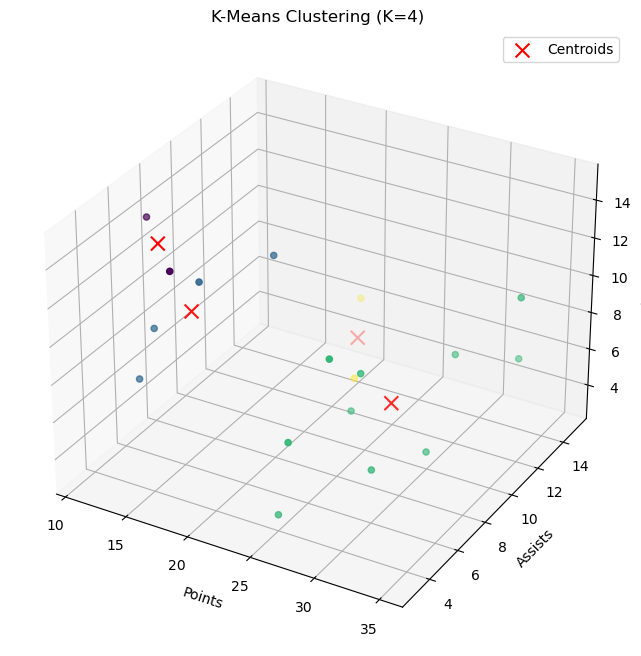

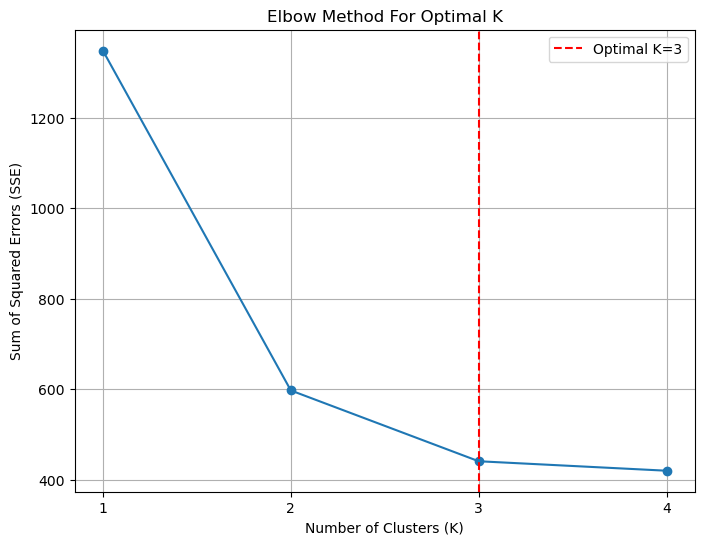

In [10]:
runner(df1, euclidean_distance)

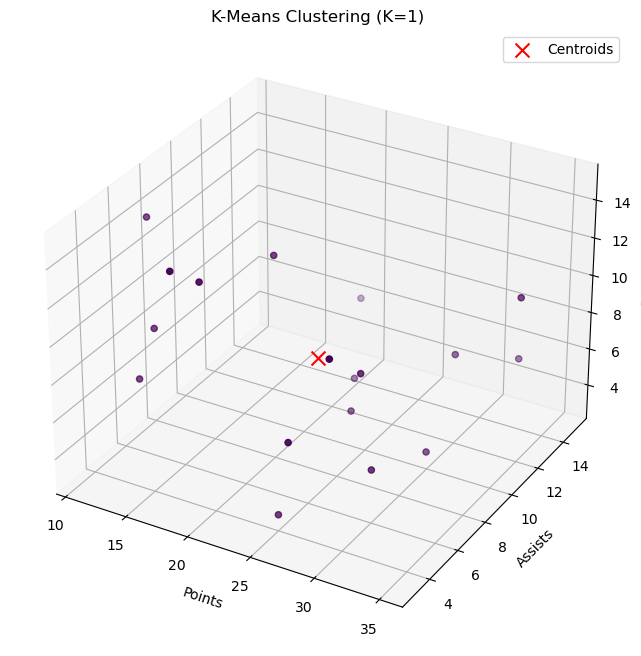

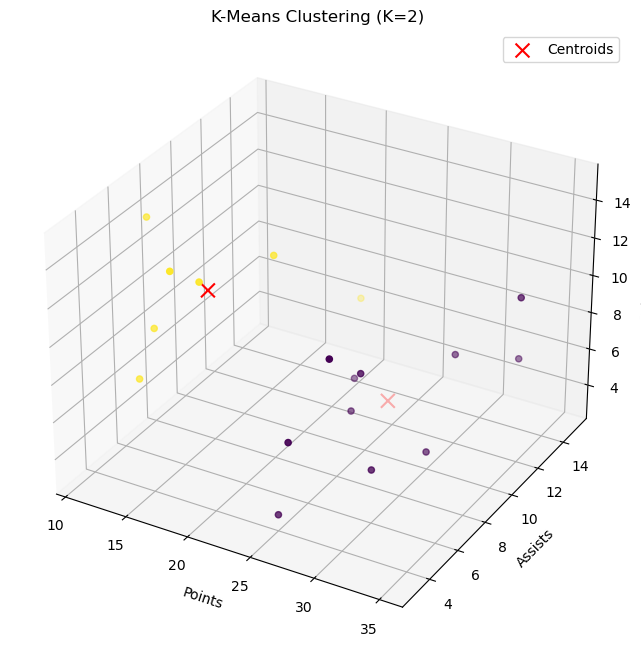

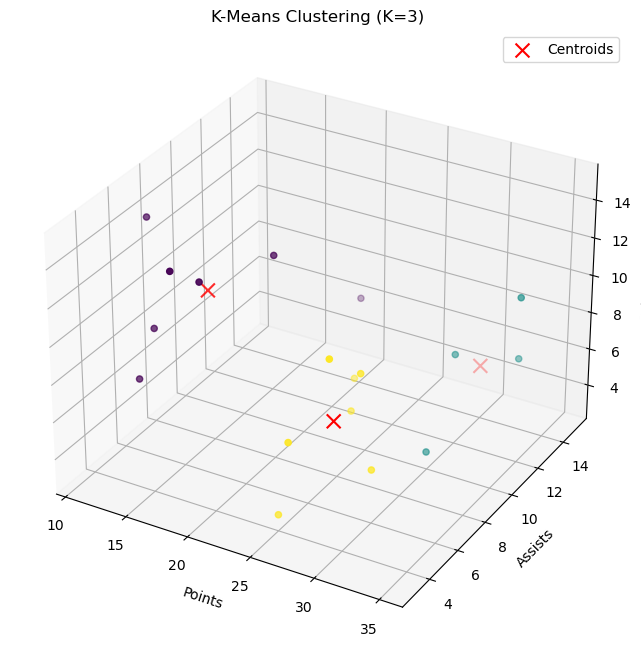

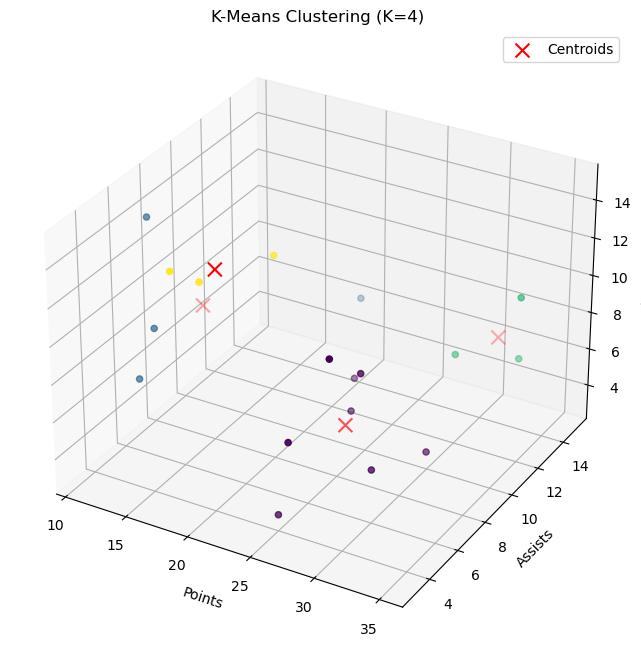

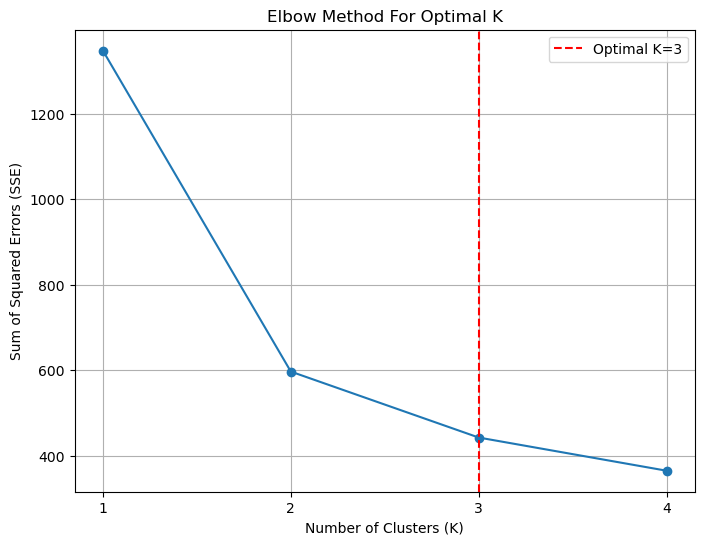

In [11]:
runner(df1, manhattan_distance)

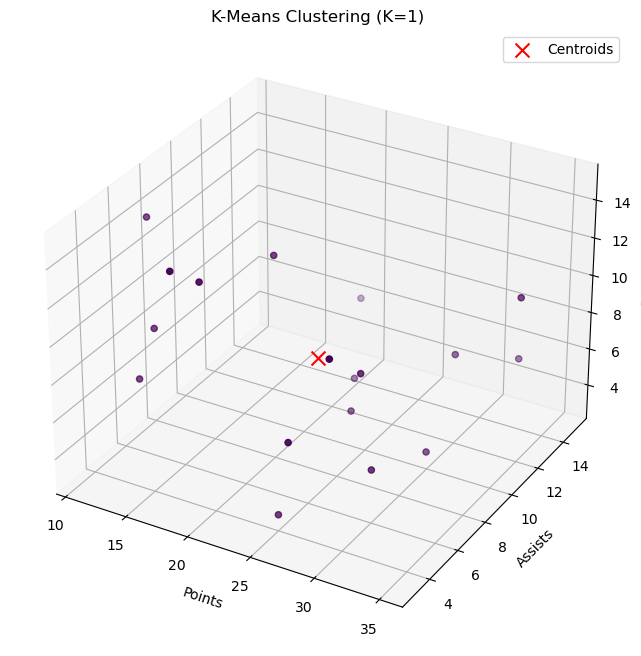

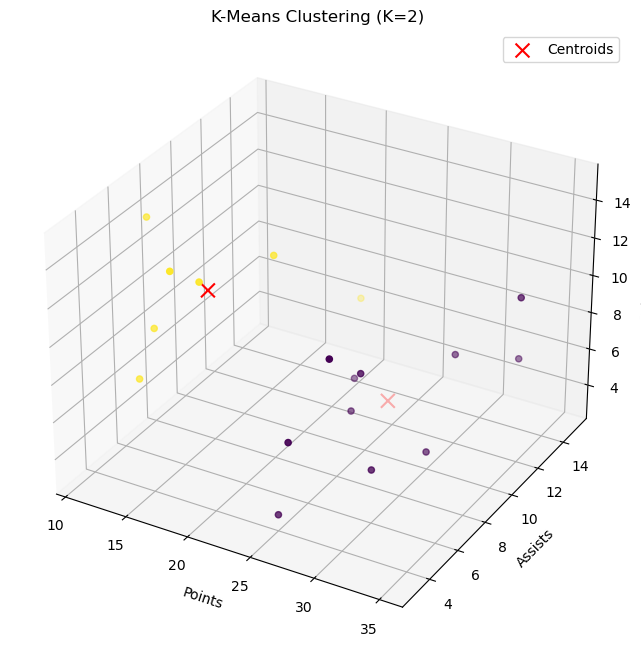

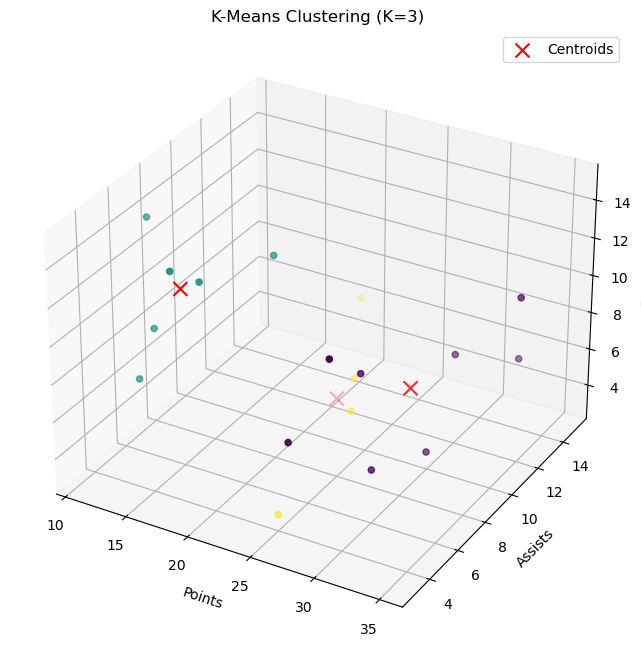

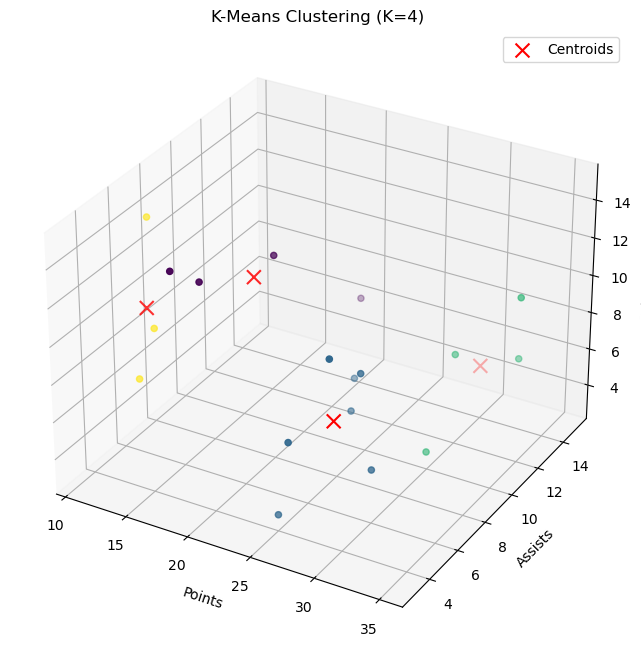

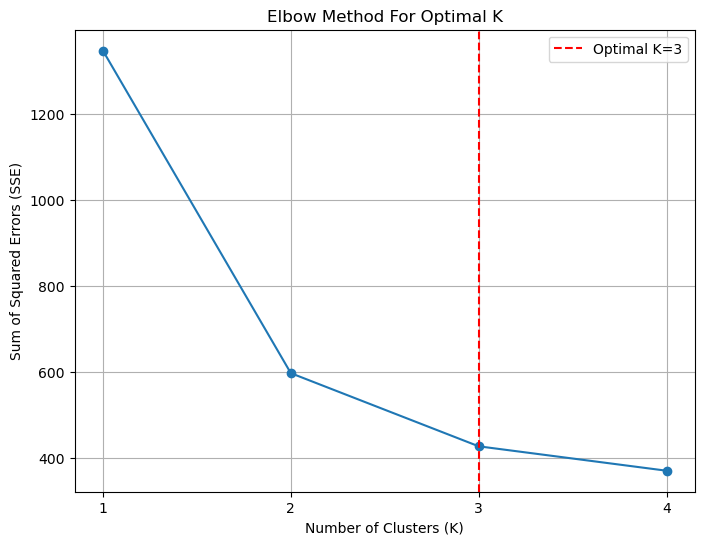

In [12]:
runner(df1, minkowski_distance)